In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import warnings
import itertools
import matplotlib
from pylab import rcParams

Statsmodels is a python module that supports Rlike interfaces for statistical modeling:
What is particuliarly important here is the tsa (Time Series Analysis) class is utilized to provide the algs for projecting seasonal variations around a linear projection as will be seen in the code. It does this by manipulating a polynomical of order 4.

In [2]:
# plot settings

In [3]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
# variable definitions

In [5]:
basedir= "../../Data/" 
baseimgdir="../images/"
monthstoprojectforward =361
windcol='blue'
solarcol='yellow'
renewcol='lime'
coalcol='black'
hydrocol='lightblue'
biocol='brown'

In [6]:
data = pd.read_csv(basedir + 'net_generation.csv')
data.head()

,Date,"Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
0,12/1/2020,1.862813,70.54828,326.5772,1.512993,-0.496784,23.82805,116.4394,72.54646,0.640074,0.428227,1.589645,64.88192,5.012265,326.5772,32.66580
1,11/1/2020,1.638054,55.38093,292.8734,1.431412,-0.336250,20.84670,111.2597,66.10233,0.605994,0.317438,1.562592,57.98058,5.924216,292.8734,28.14019
2,10/1/2020,2.264039,57.85693,306.3560,1.337518,-0.442759,19.63240,126.3004,61.42273,0.613575,0.156562,1.326140,59.12239,7.522503,306.3560,28.36593
3,9/1/2020,1.954046,63.53742,318.2363,1.379625,-0.620189,18.59246,136.5059,63.85781,0.327863,0.345714,1.804214,52.47764,8.976820,318.2363,21.57470
4,8/1/2020,2.114324,93.90338,388.0824,1.376648,-0.752724,21.51756,162.1831,70.26038,0.490478,0.413946,1.889336,59.69450,9.742568,388.0824,24.94340


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.set_index('Date')
df

,"Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
Date,,,,,,,,,,,,,,,
2020-12-01,1.862813,70.548280,326.5772,1.512993,-0.496784,23.828050,116.439400,72.546460,0.640074,0.428227,1.589645,64.88192,5.012265,326.5772,32.665800
2020-11-01,1.638054,55.380930,292.8734,1.431412,-0.336250,20.846700,111.259700,66.102330,0.605994,0.317438,1.562592,57.98058,5.924216,292.8734,28.140190
2020-10-01,2.264039,57.856930,306.3560,1.337518,-0.442759,19.632400,126.300400,61.422730,0.613575,0.156562,1.326140,59.12239,7.522503,306.3560,28.365930
2020-09-01,1.954046,63.537420,318.2363,1.379625,-0.620189,18.592460,136.505900,63.857810,0.327863,0.345714,1.804214,52.47764,8.976820,318.2363,21.574700
2020-08-01,2.114324,93.903380,388.0824,1.376648,-0.752724,21.517560,162.183100,70.260380,0.490478,0.413946,1.889336,59.69450,9.742568,388.0824,24.943400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-05-01,1.744683,150.043237,NaN,1.071382,-0.622526,18.875194,44.283321,61.512445,NaN,0.050532,9.933711,NaN,NaN,NaN,0.635029
2001-04-01,1.657999,139.033764,NaN,1.094990,-0.795915,17.722778,39.413096,56.003026,NaN,0.043303,10.415996,NaN,NaN,NaN,0.684694
2001-03-01,1.746260,153.452065,NaN,1.190022,-0.773345,20.132660,37.452990,62.140712,NaN,0.045323,11.206700,NaN,NaN,NaN,0.532120


In [8]:
price = pd.read_csv(basedir + 'prices.csv')
price['Date'] = pd.to_datetime(price['Date'])
price_df = price.set_index('Date')
price_df

,"Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)"
Date,
1990-01-01,6.27000
1990-02-01,6.34000
1990-03-01,6.37000
1990-04-01,6.35000
1990-05-01,6.46000
...,...
2020-08-01,11.12406
2020-09-01,10.81302
2020-10-01,10.57964


In [9]:
price_gen = pd.merge(price_df,df, on='Date')
price_gen = price_gen.loc['2010-01-01':'2019-10-31']
price_gen.tail()

,"Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)","Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
Date,,,,,,,,,,,,,,,,
2019-06-01,10.80000,2.500330,78.024793,338.738883,1.370651,-0.385296,26.227339,128.333890,68.804879,0.599223,0.344190,1.405163,61.612041,8.139909,338.738883,23.373812
2019-07-01,11.06000,2.659966,100.402957,396.911009,1.426077,-0.622347,22.808609,164.789078,72.198595,0.618224,0.404281,1.595532,57.524689,8.182786,396.911009,22.447251
2019-08-01,10.98163,2.102103,105.580100,396.437600,1.373647,-0.799442,20.914850,164.225300,71.498100,0.490829,0.420494,1.901299,53.120960,7.578059,396.437600,21.152300
2019-09-01,10.69525,2.100022,88.324590,343.517200,1.304915,-0.646617,20.927660,135.224700,65.847270,0.325633,0.355415,1.880829,52.205360,7.066358,343.517200,20.806410
2019-10-01,10.46704,2.396545,68.329570,306.896700,1.389165,-0.473988,20.722700,120.144200,62.172640,0.608672,0.158158,1.458057,54.499380,5.989832,306.896700,24.001140


In [10]:
list(price_gen)

['Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)',
 'Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)',
 'Net energy for electricity load, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from other nonrenewable fuels,

In [11]:
# price = price_gen['Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)']
bio = price_gen['Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)']
geo = price_gen['Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)']
hydro = price_gen['Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)']
conv_hydro = price_gen['Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)']
nat_gas = price_gen['Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)']
nuc = price_gen['Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)']
nonrenew = price_gen['Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)']
coal = price_gen['Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)']
petro = price_gen['Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)']
renew_sum = price_gen['Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)']
total = price_gen['Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)']
solar = price_gen['Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)']
wind = price_gen['Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)']

# All elements as perecent of total
bio_pct = bio/total
geo_pct = geo/total
hydro_pct = hydro/total
conv_hydro_pct = conv_hydro/total
nat_gas_pct = nat_gas/total
nuc_pct = nuc/total
nonrenew_pct = nonrenew/total
coal_pct = coal/total
petro_pct = petro/total
solar_pct = solar/total
wind_pct = wind/total
renew_pct = renew_sum/total

# All elements as percent of renewable total
bio_pct_green = bio/renew_sum
geo_pct_green = geo/renew_sum
hydro_pct_green = hydro/renew_sum
conv_hydro_pct_green = conv_hydro/renew_sum
nat_gas_pct_green = nat_gas/renew_sum
nuc_pct_green = nuc/renew_sum
nonrenew_pct_green = nonrenew/renew_sum
coal_pct_green = coal/renew_sum
petro_pct_green = petro/renew_sum
solar_pct_green = solar/renew_sum
wind_pct_green = wind/renew_sum

In [12]:
# this is acollection of dataframes that will referenced in loops below
var = [nat_gas, coal, total, solar, wind, renew_sum]

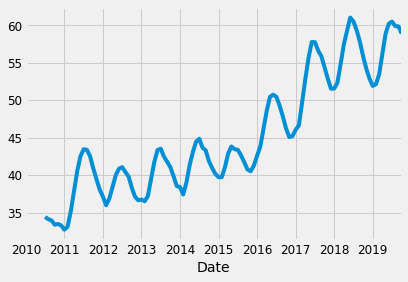

In [14]:
MA = renew_sum.rolling(7).mean()
MA.plot()

## Multi Variate ML Model

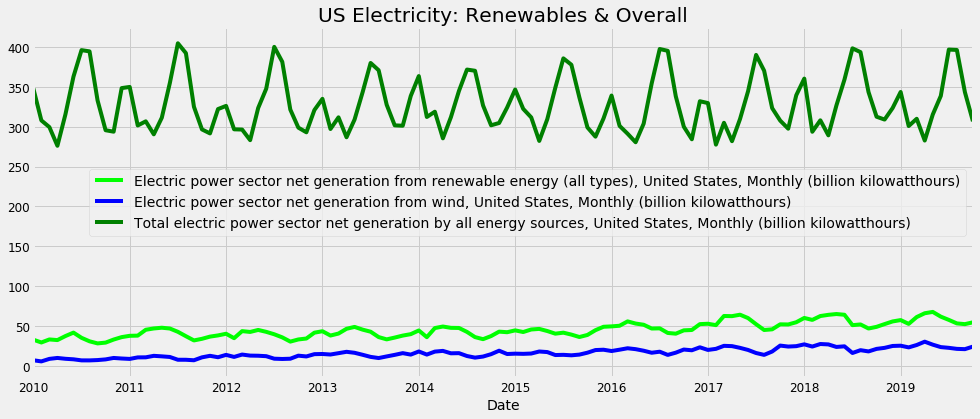

In [15]:
renew_sum.plot(figsize=(15, 6),color='lime')
wind.plot(color='blue')
total.plot(color='green')
plt.legend()
plt.title("US Electricity: Renewables & Overall")
plt.show()

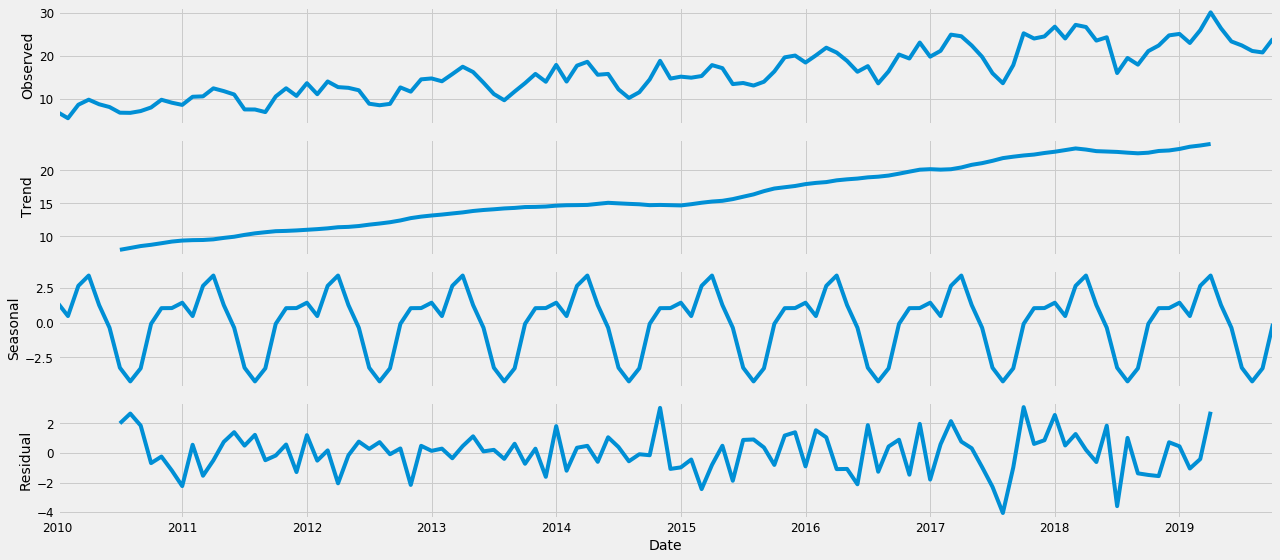

In [17]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(wind, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(wind,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:998.6010261372122
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:804.0716776866299
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:515.0606410211702
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:454.5671103279081
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:477.5386847041349
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:440.7732770972876
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:459.54740052248354
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:436.59076116531196
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:856.4647589654029
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:697.894455774936
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:491.80323708034075
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:441.07028462339724
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:476.34416373307766
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:430.3885135210013
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:452.2156437526496
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:430.1609011889548
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:544.8580030151255
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:482.6914673044929
ARIMA(

In [21]:
mod = sm.tsa.statespace.SARIMAX(renew_sum,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3996      0.156      2.568      0.010       0.095       0.705
ma.L1         -0.8563      0.092     -9.313      0.000      -1.037      -0.676
ar.S.L12      -0.3564      0.094     -3.800      0.000      -0.540      -0.173
sigma2         9.2898      1.619      5.737      0.000       6.116      12.463


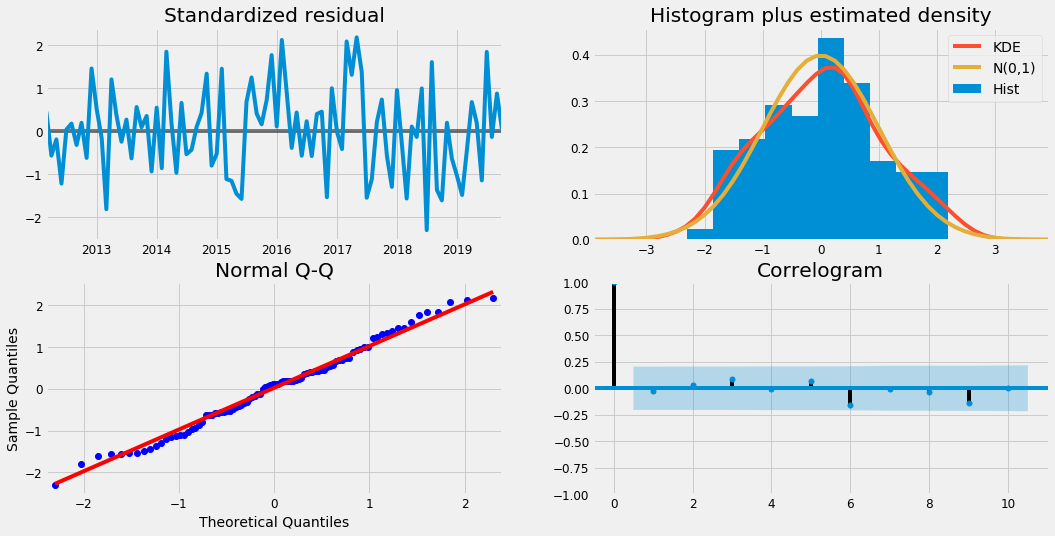

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

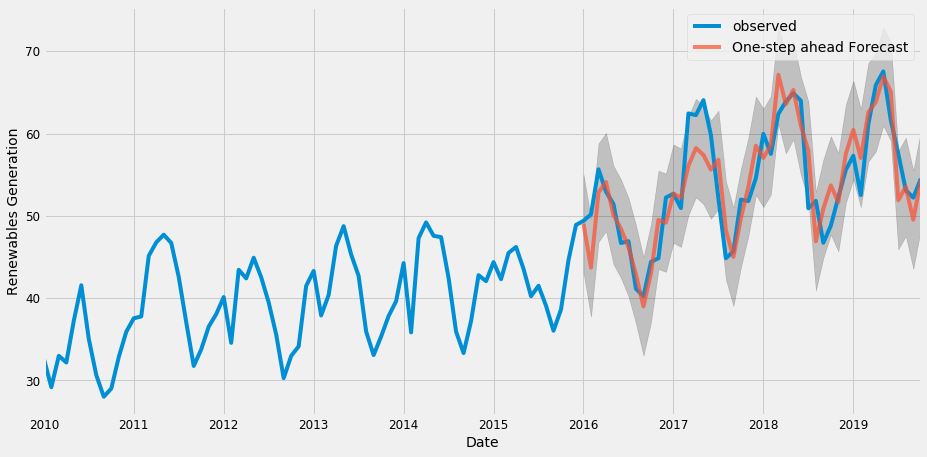

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = renew_sum['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Renewables Generation')

plt.legend()
plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = renew_sum['2010-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11.3


In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3.36


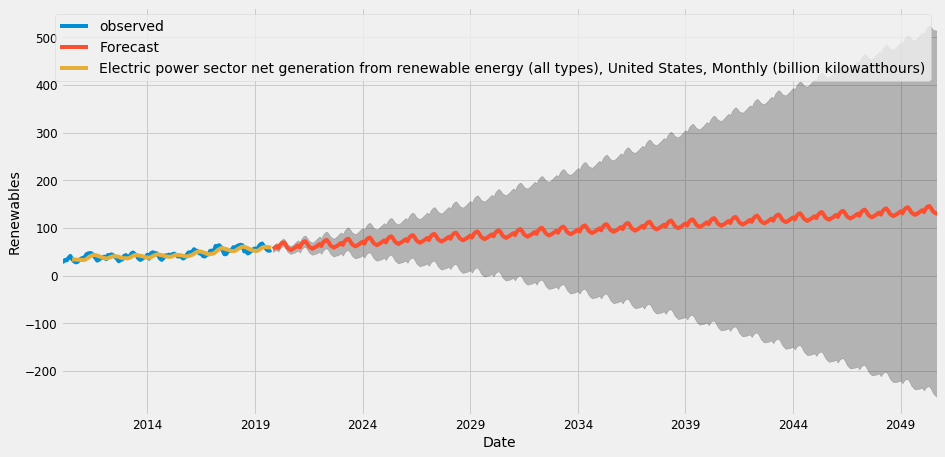

In [26]:
pred_uc = results.get_forecast(steps=372)
pred_ci = pred_uc.conf_int()
ax = renew_sum.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Renewables')
MA.plot()
plt.legend()
plt.show()

## Loops Model

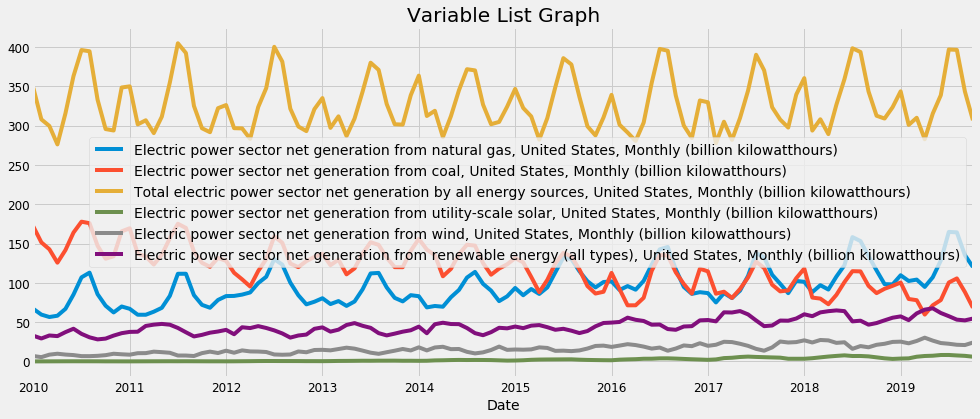

In [29]:
for i in var:
    i.plot(figsize=(15, 6))
#     i.plot()
    plt.legend()
    plt.title("Variable List Graph")
plt.show()

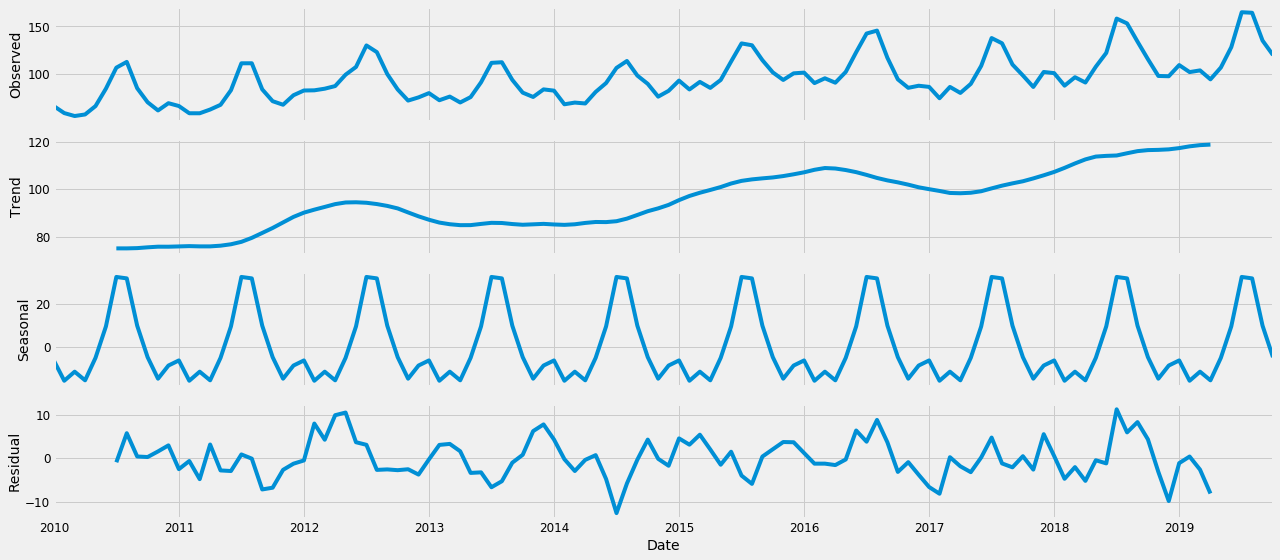

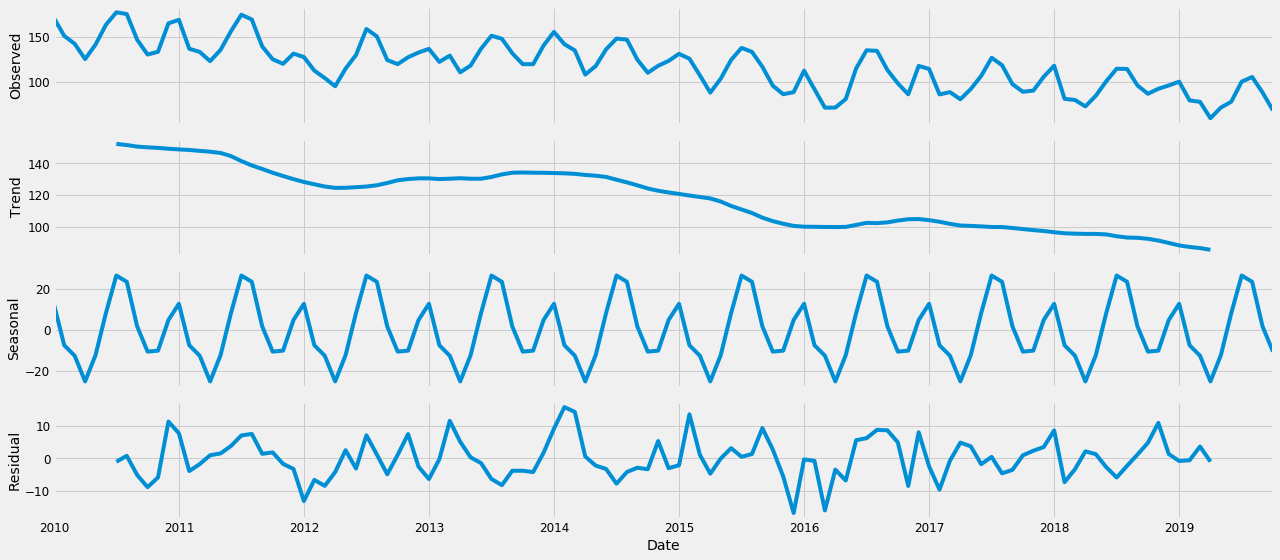

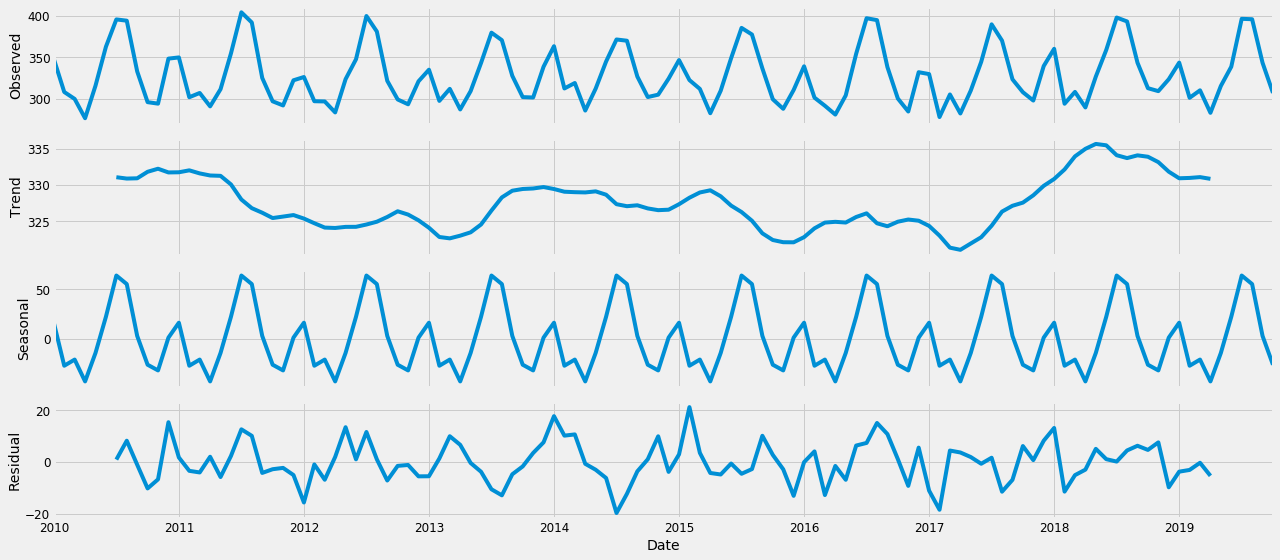

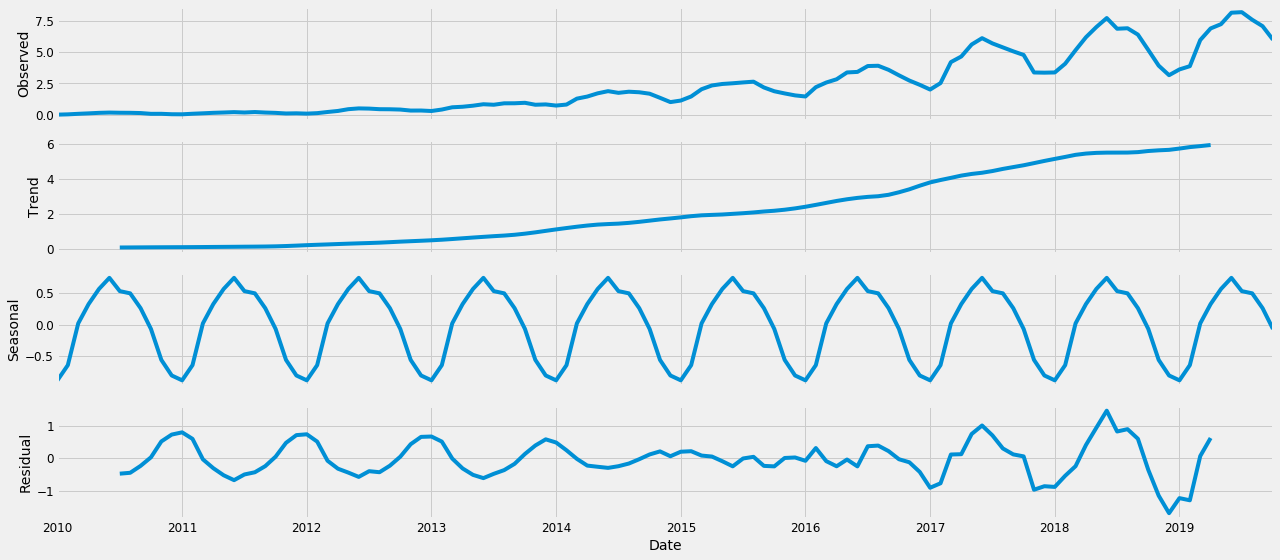

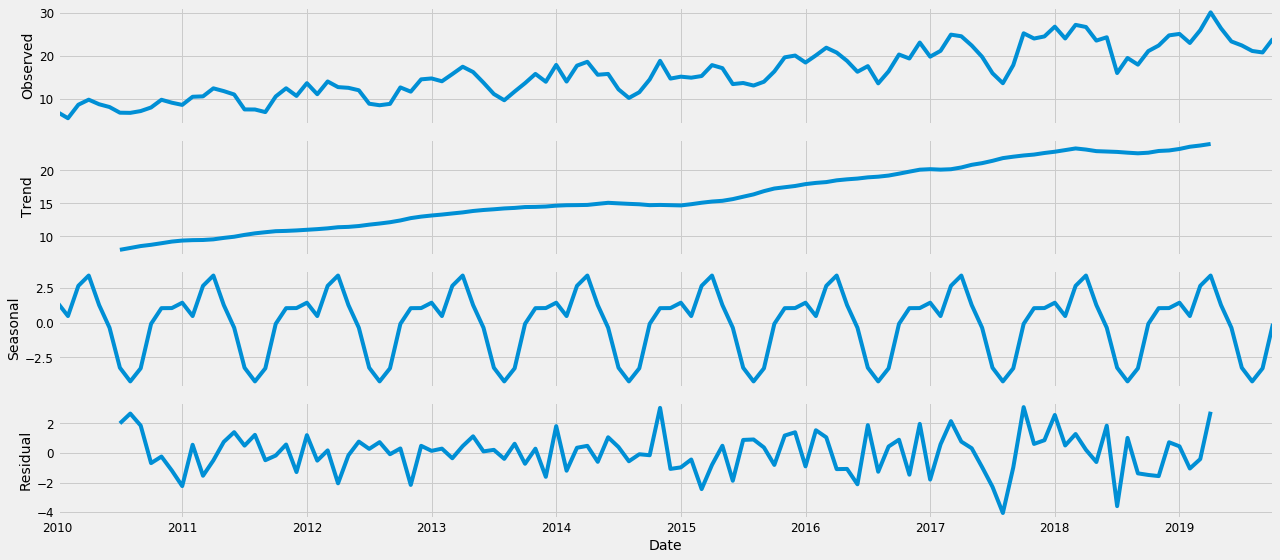

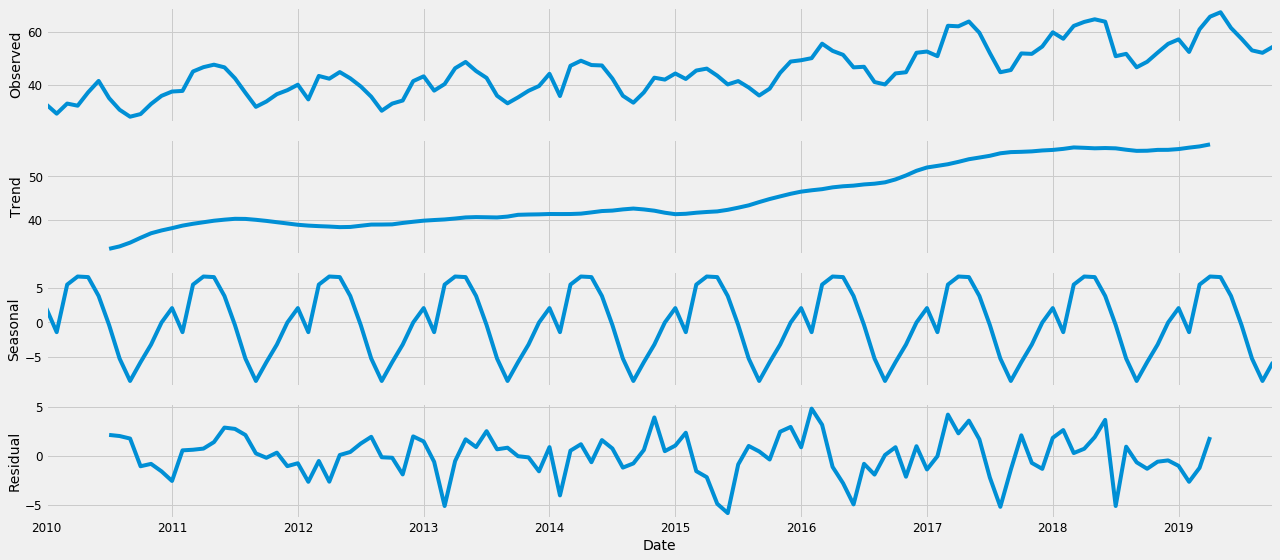

In [30]:
# This shows how the time series estimations compare to actual data
# This gives an estimation of how well the time series projections
colors=['green','blue','red','yellow','purple','tomato']
c=0
for i in var:
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(i, model='additive')
    fig = decomposition.plot()
    plt.show()
    c=c+1


In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [32]:
results_1 = []

for i in var:
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(i,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results_1 = mod.fit()
            
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_1.aic))
            
            except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1409.466999282597
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1164.3484576947683
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:830.9676246852
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:741.1526341234089
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:826.1963096614827
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:759.1184073990088
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:751.3120023225771
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:741.3464630083591
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1255.8063719703964
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1029.620976035
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:740.6279342666103
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:654.998114145381
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:746.4006612350909
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:690.2156853343376
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:674.588126117857
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:653.9509194577909
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:937.8722230124755
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:783.4449907580149
ARIMA(0, 1, 0)x(

In [33]:
models = []
model_results = []

for i in var:
    model = sm.tsa.statespace.SARIMAX(i,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    model_results.append(model.fit())

In [35]:
for i in model_results:
    print(i.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6289      0.603      1.043      0.297      -0.553       1.810
ma.L1         -0.6954      0.580     -1.198      0.231      -1.833       0.442
ar.S.L12      -0.5025      0.102     -4.941      0.000      -0.702      -0.303
sigma2        29.5845      4.912      6.023      0.000      19.957      39.212
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3108      0.279      1.114      0.265      -0.236       0.858
ma.L1         -0.5959      0.235     -2.538      0.011      -1.056      -0.136
ar.S.L12      -0.3069      0.114     -2.687      0.007      -0.531      -0.083
sigma2        79.8131     12.814      6.229      0.000      54.699     104.928
                 coef    std err          z      P>|

In [36]:
model_results

In [37]:
zipper = list(zip(var,model_results))
print(zipper[1:])

[(Date
2010-01-01    171.660230
2010-02-01    151.461095
2010-03-01    142.664919
2010-04-01    125.614640
2010-05-01    141.669249
                 ...    
2019-06-01     78.024793
2019-07-01    100.402957
2019-08-01    105.580100
2019-09-01     88.324590
2019-10-01     68.329570
Name: Electric power sector net generation from coal, United States, Monthly (billion kilowatthours), Length: 118, dtype: float64, <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000020B12BB0788>), (Date
2010-01-01    348.128123
2010-02-01    307.993573
2010-03-01    299.570778
2010-04-01    276.121274
2010-05-01    315.655680
                 ...    
2019-06-01    338.738883
2019-07-01    396.911009
2019-08-01    396.437600
2019-09-01    343.517200
2019-10-01    306.896700
Name: Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours), Length: 118, dtype: float64, <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at

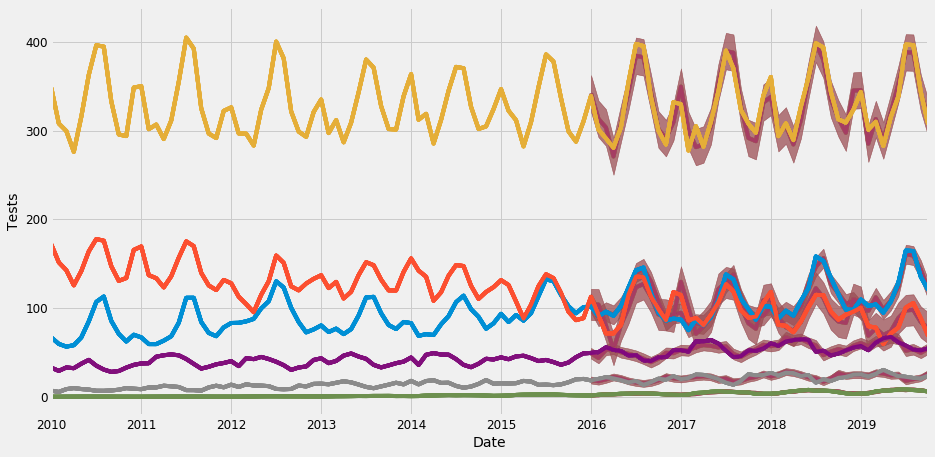

In [38]:
colors =['red','green','blue','yellow','tomato','purple']
for i in model_results:
    
    pred = i.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

    
    c=0
    for i in var:    
        pred_ci = pred.conf_int()
        ax = i['2010':].plot(label='observed')
        pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, color=colors[c], figsize=(14, 7))
        ax.fill_between(pred_ci.index,
                        pred_ci.iloc[:, 0],
                        pred_ci.iloc[:, 1],  color=colors[c], alpha=.2)


        ax.set_xlabel('Date')
        ax.set_ylabel('Tests')
        c=c+1
#plt.legend()
plt.savefig(baseimgdir + 'CurrentPojections.png')
plt.show()

In [39]:
for i in var:    
    y_forecasted = pred.predicted_mean
    y_truth = renew_sum['2010-01-01':]
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11.3
The Mean Squared Error of our forecasts is 11.3
The Mean Squared Error of our forecasts is 11.3
The Mean Squared Error of our forecasts is 11.3
The Mean Squared Error of our forecasts is 11.3
The Mean Squared Error of our forecasts is 11.3


In [40]:
for i in var:
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 3.36
The Root Mean Squared Error of our forecasts is 3.36
The Root Mean Squared Error of our forecasts is 3.36
The Root Mean Squared Error of our forecasts is 3.36
The Root Mean Squared Error of our forecasts is 3.36
The Root Mean Squared Error of our forecasts is 3.36


In [41]:
def PassCSVtoDFandBack(name):
    df =pd.read_csv(name)
    
    return df

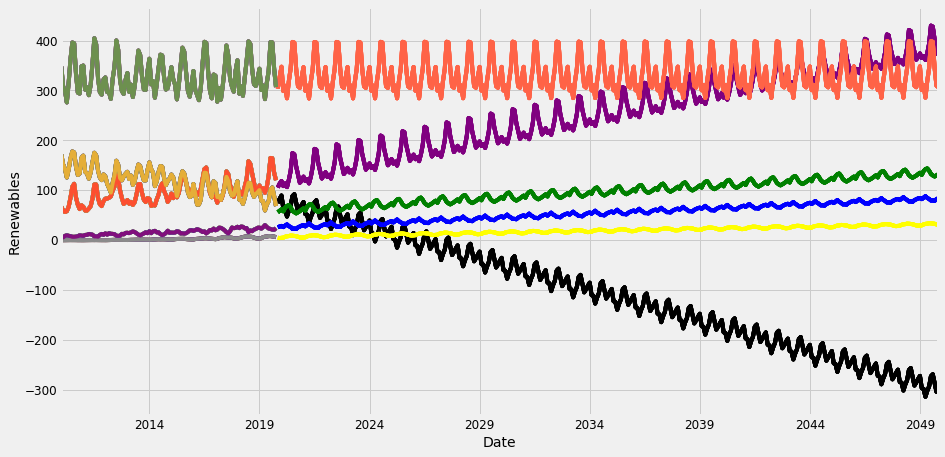

In [42]:
# This plots out all of the linear projections of the time series
colors = ['purple', 'black', 'tomato','yellow','blue','green']
hdrs =['NG_proj','Coal_proj','TotalNet_proj','Solar_proj','Wind_proj','TotalRew_proj']
c=0
for j in model_results:

    pred_uc = j.get_forecast(steps=monthstoprojectforward)
    for i in range(0,5) :#var:
        pred_ci = pred_uc.conf_int()
        ax = var[i].plot(label='observed', figsize=(14, 7))

        pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color=colors[c])
#         ax.fill_between(pred_ci.index,
#                         pred_ci.iloc[:, 0],
#                         pred_ci.iloc[:, 1], color=colors[c], alpha=.2) 
  
        ax.set_xlabel('Date')
        ax.set_ylabel('Renewables')
#     create named data 
    pred_uc.predicted_mean.columns =['Date',hdrs[c]]
    pred_uc.predicted_mean.to_csv(basedir+hdrs[c]+'_'+colors[c]+"_predicted_mean_curve.csv",index_label='Date',header=[hdrs[c]])
    c=c+1
        
    
#     plt.legend()
plt.savefig(baseimgdir + '2010_2050NetElec.png')
plt.show()

## What happens when coal bottoms out?

The extrapolation becomes non linear because when coal bottoms out and goes negative there is no such thing, so coal goes to zero. As a result,from that point on , the total curve has to be recalculated. So, we have to create a new set of dataframes to play with. Now, the question becomes how much electricity usage do we project? It has been flat for the last ten years, and there is some reason to believe that it may decline in some circles, but that does not seem likely as cars become electric, putting more demand on electricity to replace the fossil fuels that cars have used.

In [44]:
colors = ['purple', 'black', 'tomato','yellow','blue','green']
hdrs =['NG_proj','Coal_proj','TotalNet_proj','Solar_proj','Wind_proj','TotalRew_proj']
var2=[] # to replace the var, the collection of dataframes used above
for c in range(0,6):
    df=PassCSVtoDFandBack(basedir+hdrs[c]+'_'+colors[c]+"_predicted_mean_curve.csv")
    df3=df[hdrs[c]].map(lambda x : 0 if (float(x) <= 0) else float(x)) #any projection less than zero
    if c>0: # for all but the first DF drop the Date column
        df2=df3.drop(columns='Date',axis=1)
        var2.append(df2) #create corrected list
    else:
        var2.append(df3) #keep the Date column, we are going need it 
# Once above loop done, append the dataframes together by column

dfc=pd.concat([var2[0], var2[1],var2[2],var2[3],var2[4],var2[5]], axis=1)
dfc.to_csv(basedir + 'AllProjections.csv')
dfc.head()

,NG_proj,Coal_proj,TotalNet_proj,Solar_proj,Wind_proj,TotalRew_proj
0,105.544596,74.578615,303.917701,4.745044,26.006903,55.994023
1,113.341760,82.583095,326.705284,4.211051,27.382452,58.862129
2,118.578113,89.457120,347.627297,4.576507,28.525233,61.763935
3,108.407843,63.673721,298.860506,4.966772,26.147923,57.780962
4,113.727712,62.219871,309.478651,6.796874,29.212858,65.017756


In [45]:
df_combined_proj = pd.merge(df, dfc)
df_combined_proj

,Date,TotalRew_proj,NG_proj,Coal_proj,TotalNet_proj,Solar_proj,Wind_proj
0,2019-11-01,55.994023,105.544596,74.578615,303.917701,4.745044,26.006903
1,2019-12-01,58.862129,113.341760,82.583095,326.705284,4.211051,27.382452
2,2020-01-01,61.763935,118.578113,89.457120,347.627297,4.576507,28.525233
3,2020-02-01,57.780962,108.407843,63.673721,298.860506,4.966772,26.147923
4,2020-03-01,65.017756,113.727712,62.219871,309.478651,6.796874,29.212858
...,...,...,...,...,...,...,...
356,2049-07-01,132.729734,430.054469,0.000000,398.878734,33.752071,79.542777
357,2049-08-01,129.717405,427.998226,0.000000,397.521096,33.283720,79.608954
358,2049-09-01,127.704997,402.349730,0.000000,345.171495,32.774433,78.921263
359,2049-10-01,129.943951,386.174204,0.000000,309.732114,31.667303,82.107614


In [46]:
df_combined_proj.set_index('Date', inplace = True)
df_combined_proj.head()

,TotalRew_proj,NG_proj,Coal_proj,TotalNet_proj,Solar_proj,Wind_proj
Date,,,,,,
2019-11-01,55.994023,105.544596,74.578615,303.917701,4.745044,26.006903
2019-12-01,58.862129,113.341760,82.583095,326.705284,4.211051,27.382452
2020-01-01,61.763935,118.578113,89.457120,347.627297,4.576507,28.525233
2020-02-01,57.780962,108.407843,63.673721,298.860506,4.966772,26.147923
2020-03-01,65.017756,113.727712,62.219871,309.478651,6.796874,29.212858


In [48]:
df_combined_proj.to_csv(basedir + 'Revised_All_Proj_RH.csv')
df_combined_proj

,TotalRew_proj,NG_proj,Coal_proj,TotalNet_proj,Solar_proj,Wind_proj
Date,,,,,,
2019-11-01,55.994023,105.544596,74.578615,303.917701,4.745044,26.006903
2019-12-01,58.862129,113.341760,82.583095,326.705284,4.211051,27.382452
2020-01-01,61.763935,118.578113,89.457120,347.627297,4.576507,28.525233
2020-02-01,57.780962,108.407843,63.673721,298.860506,4.966772,26.147923
2020-03-01,65.017756,113.727712,62.219871,309.478651,6.796874,29.212858
...,...,...,...,...,...,...
2049-07-01,132.729734,430.054469,0.000000,398.878734,33.752071,79.542777
2049-08-01,129.717405,427.998226,0.000000,397.521096,33.283720,79.608954
2049-09-01,127.704997,402.349730,0.000000,345.171495,32.774433,78.921263


In [49]:
# df=df_combined_proj
df_combined_proj['NG_Buffer_proj'] =df_combined_proj['TotalNet_proj']-94.5-df_combined_proj['Coal_proj']-df_combined_proj['Solar_proj']-df_combined_proj['Wind_proj']
df_combined_proj.tail(20)

,TotalRew_proj,NG_proj,Coal_proj,TotalNet_proj,Solar_proj,Wind_proj,NG_Buffer_proj
Date,,,,,,,
2048-04-01,139.759529,352.318750,0.0,285.597922,31.717444,86.188941,73.191537
2048-05-01,141.248521,366.049297,0.0,319.295000,32.161655,82.609496,110.023849
2048-06-01,136.633736,384.986946,0.0,344.547554,33.037761,80.626387,136.383405
2048-07-01,130.187324,421.236537,0.0,398.824142,32.896289,77.597087,193.830765
2048-08-01,127.174995,419.180295,0.0,397.466504,32.427938,77.663264,192.875302
2048-09-01,125.162587,393.531798,0.0,345.116904,31.918651,76.975573,141.722679
2048-10-01,127.401541,377.356272,0.0,309.677522,30.811521,80.161924,104.204077
2048-11-01,129.412353,361.788762,0.0,306.574161,29.566936,81.970557,100.536667
2048-12-01,132.401644,366.880086,0.0,327.634245,28.985765,83.627020,120.521461


In [50]:
list(df_combined_proj)

['TotalRew_proj',
 'NG_proj',
 'Coal_proj',
 'TotalNet_proj',
 'Solar_proj',
 'Wind_proj',
 'NG_Buffer_proj']

In [51]:
renew_proj = df_combined_proj['TotalRew_proj']
NG_Buffer_proj = df_combined_proj['NG_Buffer_proj']
Coal_proj = df_combined_proj['Coal_proj']
Total_Net_proj = df_combined_proj['TotalNet_proj']
Solar_proj = df_combined_proj['Solar_proj']
Wind_proj = df_combined_proj['Wind_proj']

In [52]:
rev_var = [renew_proj, NG_Buffer_proj, Coal_proj,Total_Net_proj,Solar_proj,Wind_proj]

## Current Net Electrical Usage Project

This projection makes several assumptions

- Total Electrical Usage will remain more or less constant until 2050
- Nuclear and Hydro contributions are constant.

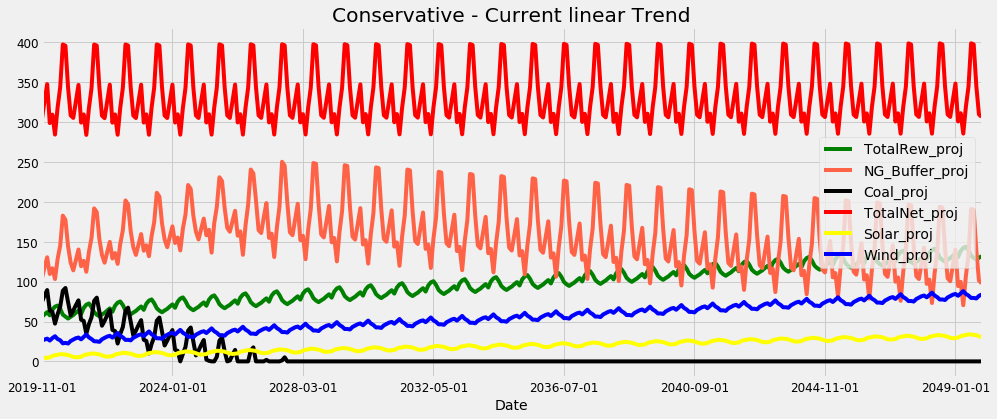

In [53]:

colors = ['green', 'tomato', 'black','red','yellow','blue']
c=0

for i in rev_var:
    i.plot(figsize=(15, 6),color=colors[c])
# #     i.plot()
    plt.legend(loc='right')
    plt.title("Conservative - Current linear Trend")
    c=c+1
plt.savefig(baseimgdir + 'NGBuffered_proj.png')
plt.show()

## Observations

- NG will continue to increase for ten years and then begin a decline
- Coal goes to zero in the next ten years
- Seasonal variation on NG after coal is exaggerated since the variation was not removed from the Total(Red)
- Doubling investment in solar and Wind would eliminate NG by 2050

In [54]:
df_combined_proj['Att_1'] = (Wind_proj **2)/20
attempt_1 = df_combined_proj['Att_1']
df_combined_proj['attempt_diff'] = attempt_1-Wind_proj

In [56]:
df_combined_proj.head()

,TotalRew_proj,NG_proj,Coal_proj,TotalNet_proj,Solar_proj,Wind_proj,NG_Buffer_proj,Att_1,attempt_diff
Date,,,,,,,,,
2019-11-01,55.994023,105.544596,74.578615,303.917701,4.745044,26.006903,104.087140,33.817950,7.811047
2019-12-01,58.862129,113.341760,82.583095,326.705284,4.211051,27.382452,118.028686,37.489935,10.107482
2020-01-01,61.763935,118.578113,89.457120,347.627297,4.576507,28.525233,130.568438,40.684445,12.159212
2020-02-01,57.780962,108.407843,63.673721,298.860506,4.966772,26.147923,109.572090,34.185695,8.037772
2020-03-01,65.017756,113.727712,62.219871,309.478651,6.796874,29.212858,116.749048,42.669555,13.456696


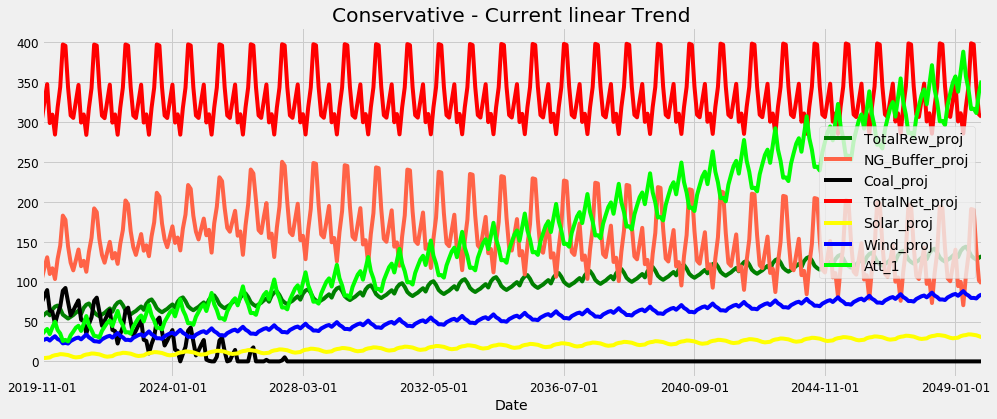

In [57]:
att = [renew_proj, NG_Buffer_proj, Coal_proj,Total_Net_proj,Solar_proj,Wind_proj,attempt_1]

colors = ['green', 'tomato', 'black','red','yellow','blue','lime']
c=0

for i in att:
    i.plot(figsize=(15, 6),color=colors[c])
# #     i.plot()
    plt.legend(loc='right')
    plt.title("Conservative - Current linear Trend")
    c=c+1
plt.savefig(baseimgdir + 'NGBuffered_proj.png')
plt.show()